In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import pathlib

In [4]:
url='/content/drive/MyDrive/Nguyen_Hoang _Sang AI/Train'
generator= ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=generator.flow_from_directory(url,target_size=(64,64),batch_size=10,class_mode='categorical',subset='training')
validation_data=generator.flow_from_directory(url,target_size=(64,64),batch_size=10,class_mode='categorical',subset='validation')
label = list()
for key in train_data.class_indices:
  label.append(key)
validation_data.class_indices
print(label)

Found 2744 images belonging to 15 classes.
Found 676 images belonging to 15 classes.
['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
model= Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding ='same',input_shape=(64,64,3)))
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation = 'relu', kernel_initializer='he_uniform' ))
model.add(Dense(15, activation='softmax'))
opt=Adam(lr=0.002)
model.compile (optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_data,epochs=330,batch_size=64,validation_data=validation_data,verbose=1)

Epoch 1/330


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


275/275 [==============================] - 13s 36ms/step - loss: 2.1398 - accuracy: 0.4034 - val_loss: 1.2918 - val_accuracy: 0.6124
Epoch 2/330
275/275 [==============================] - 10s 35ms/step - loss: 0.7456 - accuracy: 0.7569 - val_loss: 1.3477 - val_accuracy: 0.6080
Epoch 3/330
275/275 [==============================] - 10s 37ms/step - loss: 0.2118 - accuracy: 0.9351 - val_loss: 1.1236 - val_accuracy: 0.6967
Epoch 4/330
275/275 [==============================] - 10s 35ms/step - loss: 0.0899 - accuracy: 0.9781 - val_loss: 1.3183 - val_accuracy: 0.6598
Epoch 5/330
275/275 [==============================] - 10s 35ms/step - loss: 0.0344 - accuracy: 0.9916 - val_loss: 1.3768 - val_accuracy: 0.7086
Epoch 6/330
275/275 [==============================] - 10s 35ms/step - loss: 0.0190 - accuracy: 0.9964 - val_loss: 1.5941 - val_accuracy: 0.6879
Epoch 7/330
275/275 [==============================] - 10s 35ms/step - loss: 0.1494 - accuracy: 0.9541 - val_loss: 1.8640 - val_accuracy: 0.64

In [7]:
model.save('Sangcute.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


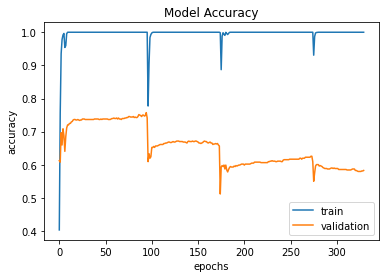

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')